# 1. IMPORT THƯ VIỆN

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("="*80)
print("DỰ ĐOÁN GIÁ Ô TÔ SỬ DỤNG LINEAR REGRESSION")
print("="*80) 

DỰ ĐOÁN GIÁ Ô TÔ SỬ DỤNG LINEAR REGRESSION


In [25]:
cleaned_data_file_path = r".\dataset\bonbanh_cleandata.xls"
normalized_data_file_path = r".\dataset\normalization_One-hot-Encoder.csv"

df = pd.read_csv(normalized_data_file_path)
df.head(5)

,year,price_num,mileage,seats,engine_capacity,car_type_Xe lắp ráp trong nước,car_type_Xe nhập khẩu,color_Bạc,color_Cam,color_Cát,color_Ghi,color_Hồng,color_Kem,color_Ngoại,color_Nâu,color_Trắng,color_Tím,color_Vàng,color_Xanh,color_Xám,color_Đen,color_Đỏ,color_Đồng,transmission_số tay,transmission_số tự động,fuel_type_dầu,fuel_type_xăng
0,0.545021,1.085790,0.061755,1.004895,0.020058,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
1,1.038785,0.320508,0.061755,1.004895,0.702203,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
2,0.791903,-0.205825,0.061755,-0.414470,0.020058,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
3,1.038785,-0.094424,0.061755,-0.414470,0.702203,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
4,0.791903,-0.803198,0.061755,-0.414470,0.020058,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True


In [26]:
print(df.shape)
df.describe()

(8111, 27)


,year,price_num,mileage,seats,engine_capacity
count,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03,8.111000e+03
mean,-1.086620e-14,7.008189e-18,7.358598e-17,-3.241287e-17,2.890878e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.602083e+00,-1.445777e+00,-2.106659e+00,-2.543516e+00,-2.026377e+00
25%,-4.425064e-01,-6.901814e-01,-5.064606e-01,-4.144698e-01,-8.326231e-01
50%,2.981394e-01,-3.575903e-01,6.175475e-02,-4.144698e-01,2.005814e-02
75%,7.919033e-01,4.093065e-01,5.034769e-01,1.004895e+00,2.005814e-02
max,1.038785e+00,3.299297e+00,2.511305e+00,2.797282e+01,1.366296e+01


In [27]:
def inverse_zscore(z_values, mean = 926484034.0278634, std = 619379267.0163128):
    return z_values * std + mean

# 2. CHUẨN BỊ DỮ LIỆU

In [28]:
print("\n\n🔧 BƯỚC 2: CHUẨN BỊ DỮ LIỆU CHO TRAINING")
print("-" * 80)

# Tách features và target
X = df.drop('price_num', axis=1)
y = df['price_num']

print(f"✓ Số lượng features: {X.shape[1]}")
print(f"✓ Target variable: price_num")
print(f"\n📊 Phân bố của biến mục tiêu (price_num):")
print(f"  - Mean: {y.mean():.4f}")
print(f"  - Std: {y.std():.4f}")
print(f"  - Min: {y.min():.4f}")
print(f"  - Max: {y.max():.4f}")

# Chia train/test set (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✓ Chia dữ liệu:")
print(f"  - Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  - Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")



🔧 BƯỚC 2: CHUẨN BỊ DỮ LIỆU CHO TRAINING
--------------------------------------------------------------------------------
✓ Số lượng features: 26
✓ Target variable: price_num

📊 Phân bố của biến mục tiêu (price_num):
  - Mean: 0.0000
  - Std: 1.0000
  - Min: -1.4458
  - Max: 3.2993

✓ Chia dữ liệu:
  - Training set: 6488 samples (80.0%)
  - Test set: 1623 samples (20.0%)


# 3. TRAINING MÔ HÌNH LINEAR REGRESSION

In [12]:
print("\n\n🎯 BƯỚC 3: TRAINING MÔ HÌNH LINEAR REGRESSION")
print("-" * 80)

# Khởi tạo và training model
model = LinearRegression()
model.fit(X_train, y_train)

print("✓ Đã training xong mô hình Linear Regression")
print(f"\n📐 Thông số mô hình:")
print(f"  - Intercept (β₀): {model.intercept_:.6f}")
print(f"  - Số lượng coefficients: {len(model.coef_)}")

# Hiển thị top 10 features quan trọng nhất
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\n🏆 Top 10 Features quan trọng nhất (theo trị tuyệt đối):")
print(feature_importance.head(10).to_string(index=False))



🎯 BƯỚC 3: TRAINING MÔ HÌNH LINEAR REGRESSION
--------------------------------------------------------------------------------


✓ Đã training xong mô hình Linear Regression

📐 Thông số mô hình:
  - Intercept (β₀): -0.485668
  - Số lượng coefficients: 26

🏆 Top 10 Features quan trọng nhất (theo trị tuyệt đối):
        Feature  Coefficient
     color_Hồng    -0.819218
engine_capacity     0.480861
      color_Tím    -0.480152
      color_Đen     0.374489
     color_Xanh     0.325858
    color_Ngoại    -0.318887
           year     0.297575
    color_Trắng     0.231008
      color_Cát     0.223954
     color_Đồng     0.217890


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# log-transform label
y_train_ = inverse_zscore(y_train)
y_test_ = inverse_zscore(y_test)
y_train_log = np.log1p(y_train_)
y_test_log = np.log1p(y_test_)

model = LinearRegression().fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# metrics (đơn vị thật)
rmse = root_mean_squared_error(y_test_, y_pred)
mae = mean_absolute_error(y_test_, y_pred)
r2 = r2_score(y_test_, y_pred)
mape = np.mean(np.abs((y_test_ - y_pred) / y_test_)) * 100

print(f"RMSE: {rmse:,.0f} VND")
print(f"MAE: {mae:,.0f} VND")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.3f}")


RMSE: 537,800,811 VND
MAE: 353,206,780 VND
MAPE: 38.59%
R²: 0.239


🔄 Đang tạo Learning Curve...

✅ Đã lưu: training_visualization.png


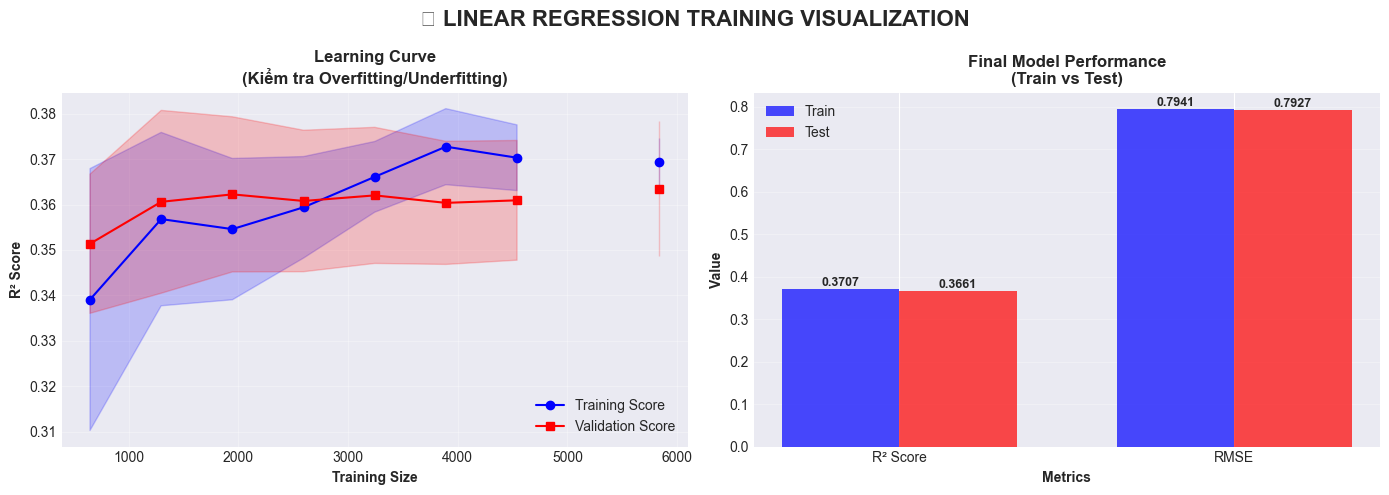


📋 TRAINING SUMMARY
🔹 Final Training R²   : 0.370701
🔹 Final Test R²       : 0.366066
🔹 R² Difference       : 0.004635
🔹 Training RMSE       : 0.794087
🔹 Test RMSE           : 0.792723
✅ Mô hình tổng quát tốt (không overfitting)


In [29]:
from sklearn.model_selection import learning_curve

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('📊 LINEAR REGRESSION TRAINING VISUALIZATION', fontsize=16, fontweight='bold')

# -----------------
# 1. LEARNING CURVE
# -----------------
print("🔄 Đang tạo Learning Curve...")
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X, y, 
    cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
axes[0].plot(train_sizes, val_mean, 's-', color='red', label='Validation Score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
axes[0].set_xlabel('Training Size', fontweight='bold')
axes[0].set_ylabel('R² Score', fontweight='bold')
axes[0].set_title('Learning Curve\n(Kiểm tra Overfitting/Underfitting)', fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)


# -----------------
# 4. FINAL MODEL PERFORMANCE
# -----------------
# Train final model
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Bar chart
metrics = ['R² Score', 'RMSE']
train_values = [train_r2, train_rmse]
test_values = [test_r2, test_rmse]

x_pos = np.arange(len(metrics))
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, train_values, width, label='Train', color='blue', alpha=0.7)
bars2 = axes[1].bar(x_pos + width/2, test_values, width, label='Test', color='red', alpha=0.7)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.4f}',
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1].set_xlabel('Metrics', fontweight='bold')
axes[1].set_ylabel('Value', fontweight='bold')
axes[1].set_title('Final Model Performance\n(Train vs Test)', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(metrics)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('training_visualization.png', dpi=300, bbox_inches='tight')
print("\n✅ Đã lưu: training_visualization.png")
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*70)
print("📋 TRAINING SUMMARY")
print("="*70)
print(f"🔹 Final Training R²   : {train_r2:.6f}")
print(f"🔹 Final Test R²       : {test_r2:.6f}")
print(f"🔹 R² Difference       : {abs(train_r2 - test_r2):.6f}")
print(f"🔹 Training RMSE       : {train_rmse:.6f}")
print(f"🔹 Test RMSE           : {test_rmse:.6f}")
print("="*70)

if abs(train_r2 - test_r2) < 0.05:
    print("✅ Mô hình tổng quát tốt (không overfitting)")
elif abs(train_r2 - test_r2) < 0.1:
    print("⚠️  Có dấu hiệu overfitting nhẹ")
else:
    print("❌ Overfitting nghiêm trọng")
print("="*70)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# 3.1. Ridge Regression (L2 Regularization)
ridge = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge R²: {ridge_cv.best_score_:.6f}")

# 3.2. Lasso Regression (L1 Regularization - Feature Selection)
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

# Lasso tự động loại bỏ features (coefficients = 0)
lasso_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.best_estimator_.coef_
})
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]['Feature'].tolist()
print(f"Lasso đã chọn {len(selected_features)}/{len(X.columns)} features")

# 3.3. ElasticNet (L1 + L2)
elastic = ElasticNet()
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
elastic_cv = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2', n_jobs=-1)
elastic_cv.fit(X_train, y_train)

# 3.4. So sánh các models
models = {
    'Linear Regression': model,
    'Ridge': ridge_cv.best_estimator_,
    'Lasso': lasso_cv.best_estimator_,
    'ElasticNet': elastic_cv.best_estimator_
}

comparison = []
for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    comparison.append({'Model': name, 'R²': r2, 'RMSE': rmse})

comparison_df = pd.DataFrame(comparison).sort_values('R²', ascending=False)
print("\n📊 So sánh các models:")
print(comparison_df)

Best Ridge alpha: 10
Best Ridge R²: 0.364716
Lasso đã chọn 20/26 features

📊 So sánh các models:
               Model        R²      RMSE
0  Linear Regression  0.366066  0.792723
3         ElasticNet  0.365709  0.792946
1              Ridge  0.365582  0.793025
2              Lasso  0.364745  0.793548


In [15]:
print(selected_features)

['year', 'mileage', 'seats', 'engine_capacity', 'car_type_Xe lắp ráp trong nước', 'car_type_Xe nhập khẩu', 'color_Bạc', 'color_Cam', 'color_Cát', 'color_Ghi', 'color_Hồng', 'color_Trắng', 'color_Vàng', 'color_Xanh', 'color_Xám', 'color_Đen', 'transmission_số tay', 'transmission_số tự động', 'fuel_type_dầu', 'fuel_type_xăng']


# 4. DỰ ĐOÁN VÀ ĐÁNH GIÁ MÔ HÌNH

In [34]:
print("\n\n📊 BƯỚC 4: DỰ ĐOÁN VÀ ĐÁNH GIÁ MÔ HÌNH")
print("-" * 80)

# Dự đoán trên cả train và test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Tính các metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    """Tính toán các metrics đánh giá"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R²
    n = len(y_true)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100
    
    print(f"\n📈 Kết quả trên {dataset_name}:")
    print(f"  - R² Score: {r2:.6f}")
    print(f"  - Adjusted R²: {adj_r2:.6f}")
    print(f"  - RMSE: {rmse:.6f}")
    print(f"  - MAE: {mae:.6f}")
    print(f"  - MSE: {mse:.6f}")
    print(f"  - MAPE: {mape:.2f}%")
    
    return {'R2': r2, 'Adj_R2': adj_r2, 'RMSE': rmse, 'MAE': mae, 'MSE': mse, 'MAPE': mape}

train_metrics = calculate_metrics(inverse_zscore(y_train), inverse_zscore(y_train_pred), "Training Set")
test_metrics = calculate_metrics(inverse_zscore(y_test), inverse_zscore(y_test_pred), "Test Set")

# Kiểm tra overfitting
print(f"\n⚠️  Kiểm tra Overfitting:")
r2_diff = train_metrics['R2'] - test_metrics['R2']
print(f"  - Chênh lệch R² (Train - Test): {r2_diff:.6f}")
if r2_diff < 0.05:
    print("  ✓ Mô hình tổng quát tốt (không bị overfitting)")
elif r2_diff < 0.1:
    print("  ⚠️  Mô hình có dấu hiệu overfitting nhẹ")
else:
    print("  ❌ Mô hình bị overfitting nghiêm trọng")



📊 BƯỚC 4: DỰ ĐOÁN VÀ ĐÁNH GIÁ MÔ HÌNH
--------------------------------------------------------------------------------

📈 Kết quả trên Training Set:
  - R² Score: 0.370701
  - Adjusted R²: 0.368168
  - RMSE: 491840949.374978
  - MAE: 369177426.032004
  - MSE: 241907519482079872.000000
  - MAPE: 50.23%

📈 Kết quả trên Test Set:
  - R² Score: 0.366066
  - Adjusted R²: 0.355739
  - RMSE: 490996020.328966
  - MAE: 373614729.376087
  - MSE: 241077091978882592.000000
  - MAPE: 50.76%

⚠️  Kiểm tra Overfitting:
  - Chênh lệch R² (Train - Test): 0.004635
  ✓ Mô hình tổng quát tốt (không bị overfitting)


# 5. CROSS-VALIDATION

In [ ]:
print("\n\n🔄 BƯỚC 5: CROSS-VALIDATION (5-FOLD)")
print("-" * 80)

cv_scores = cross_val_score(model, X, y, cv=5, 
                            scoring='r2',
                            n_jobs=-1)

print(f"📊 Kết quả Cross-Validation:")
print(f"  - CV Scores: {cv_scores}")
print(f"  - Mean CV Score: {cv_scores.mean():.6f}")
print(f"  - Std CV Score: {cv_scores.std():.6f}")
print(f"  - Min CV Score: {cv_scores.min():.6f}")
print(f"  - Max CV Score: {cv_scores.max():.6f}")



🔄 BƯỚC 5: CROSS-VALIDATION (5-FOLD)
--------------------------------------------------------------------------------
📊 Kết quả Cross-Validation:
  - CV Scores: [0.33587627 0.37637763 0.36222331 0.37846258 0.36681227]
  - Mean CV Score: 0.363950
  - Std CV Score: 0.015260
  - Min CV Score: 0.335876
  - Max CV Score: 0.378463


# 6. PHÂN TÍCH RESIDUALS

In [18]:
print("\n\n🔬 BƯỚC 6: PHÂN TÍCH RESIDUALS (SỐ DƯ)")
print("-" * 80)

# Tính residuals
residuals = inverse_zscore(y_test) - inverse_zscore(y_test_pred)

print(f"📈 Thống kê Residuals:")
print(f"  - Mean: {residuals.mean():.6f}")
print(f"  - Std: {residuals.std():.6f}")
print(f"  - Min: {residuals.min():.6f}")
print(f"  - Max: {residuals.max():.6f}")

# Kiểm tra phân phối chuẩn của residuals (Shapiro-Wilk test)
if len(residuals) >= 3:
    statistic, p_value = stats.shapiro(residuals)
    print(f"\n🧪 Shapiro-Wilk Test (Kiểm tra phân phối chuẩn):")
    print(f"  - Test Statistic: {statistic:.6f}")
    print(f"  - P-value: {p_value:.6f}")
    if p_value > 0.05:
        print("  ✓ Residuals có phân phối chuẩn (p > 0.05)")
    else:
        print("  ⚠️  Residuals không có phân phối chuẩn (p <= 0.05)")



🔬 BƯỚC 6: PHÂN TÍCH RESIDUALS (SỐ DƯ)
--------------------------------------------------------------------------------
📈 Thống kê Residuals:
  - Mean: -4921560.138653
  - Std: 491122677.971520
  - Min: -1781041158.605829
  - Max: 1875336735.704191

🧪 Shapiro-Wilk Test (Kiểm tra phân phối chuẩn):
  - Test Statistic: 0.942490
  - P-value: 0.000000
  ⚠️  Residuals không có phân phối chuẩn (p <= 0.05)


# 7. VISUALIZATION

In [ ]:
# Dùng elasticNet
final_model = ridge_cv.best_estimator_
y_train_pred_ = final_model.predict(X_train)
y_test_pred_ = final_model.predict(X_test)

# Actual vs Predicted plots
y_train_ = inverse_zscore(y_train)
y_test_ = inverse_zscore(y_test)
y_train_pred_ = inverse_zscore(y_train_pred_)
y_test_pred_ = inverse_zscore(y_test_pred_)
fig = plt.figure(figsize=(18, 10))
fig.suptitle('📈 ACTUAL VS PREDICTED PRICES', fontsize=24, fontweight='bold')
# 1. Actual vs Predicted (Train)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_train_, y_train_pred_, alpha=0.6, edgecolors='k', linewidth=0.5, color='blue')
plt.plot([y_train_.min(), y_train_.max()], [y_train_.min(), y_train_.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title('Train Set', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
# 2. Actual vs Predicted (Test)
ax2 = plt.subplot(2, 3, 2)
plt.scatter(y_test_, y_test_pred_, alpha=0.6, edgecolors='k', linewidth=0.5, color='orange')
plt.plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title('Test Set', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()



📉 BƯỚC 7: VISUALIZATION
--------------------------------------------------------------------------------


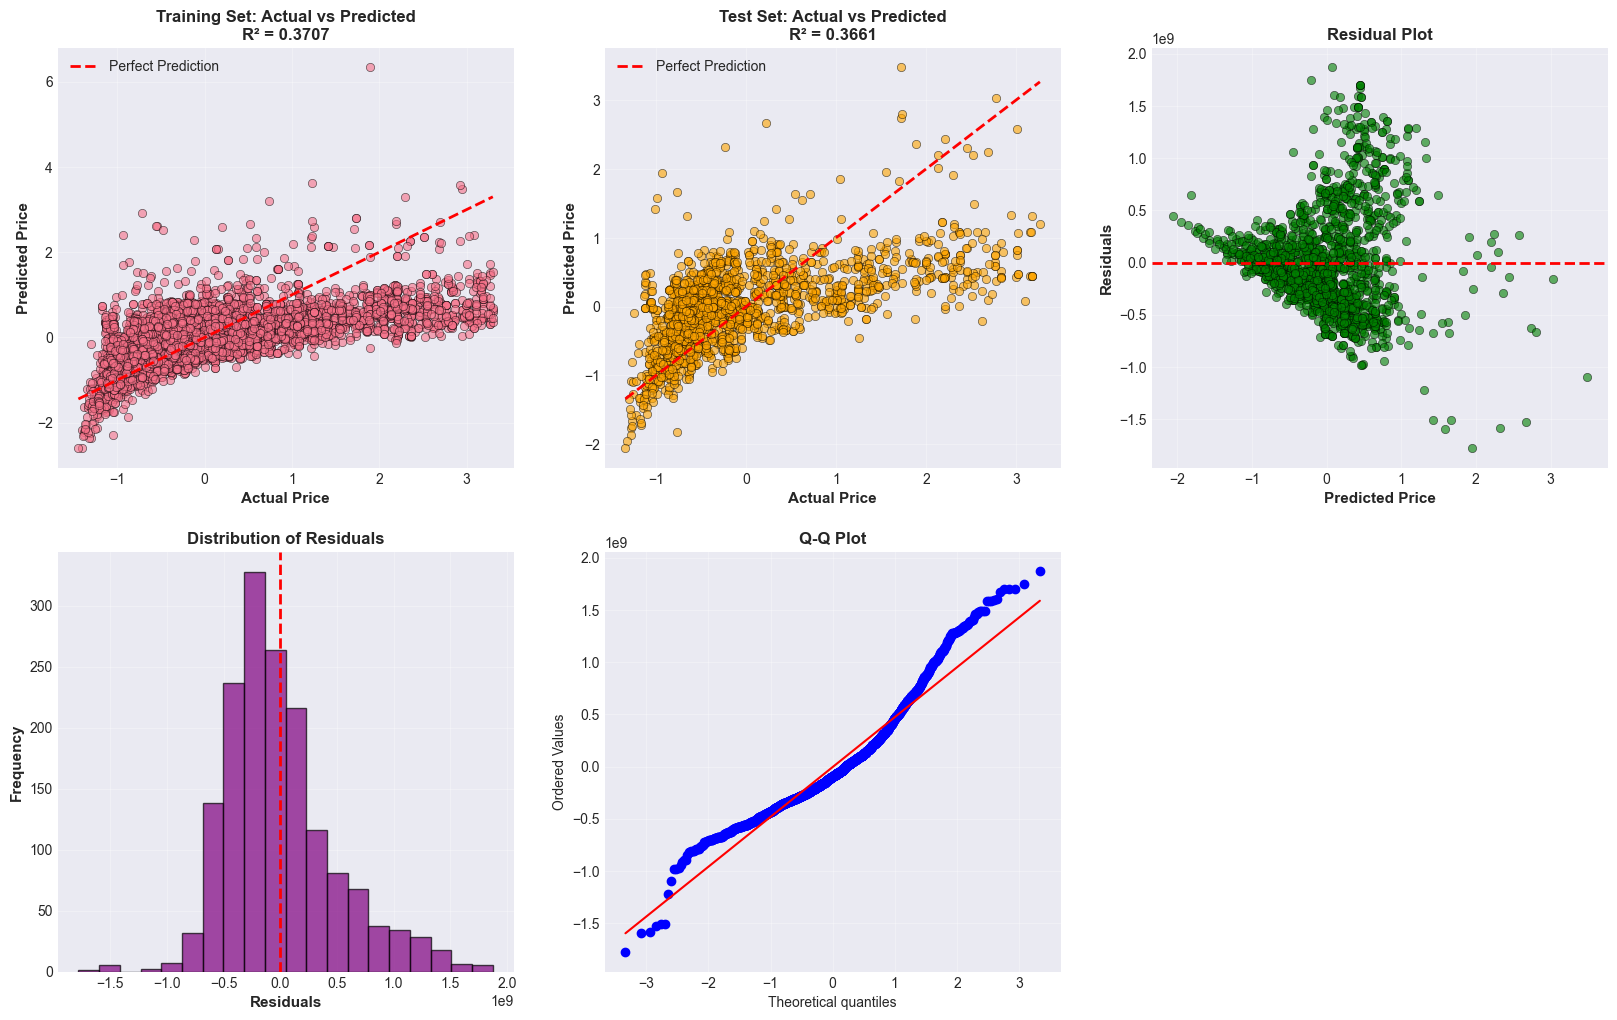

In [23]:
print("\n\n📉 BƯỚC 7: VISUALIZATION")
print("-" * 80)

fig = plt.figure(figsize=(20, 12))

# 1. Actual vs Predicted (Training)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
ax2 = plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', linewidth=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual Plot
ax3 = plt.subplot(2, 3, 3)
plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price', fontsize=11, fontweight='bold')
plt.ylabel('Residuals', fontsize=11, fontweight='bold')
plt.title('Residual Plot', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Histogram of Residuals
ax4 = plt.subplot(2, 3, 4)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Residuals', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Distribution of Residuals', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

# 5. Q-Q Plot
ax5 = plt.subplot(2, 3, 5)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)



📉 BƯỚC 7: VISUALIZATION
--------------------------------------------------------------------------------


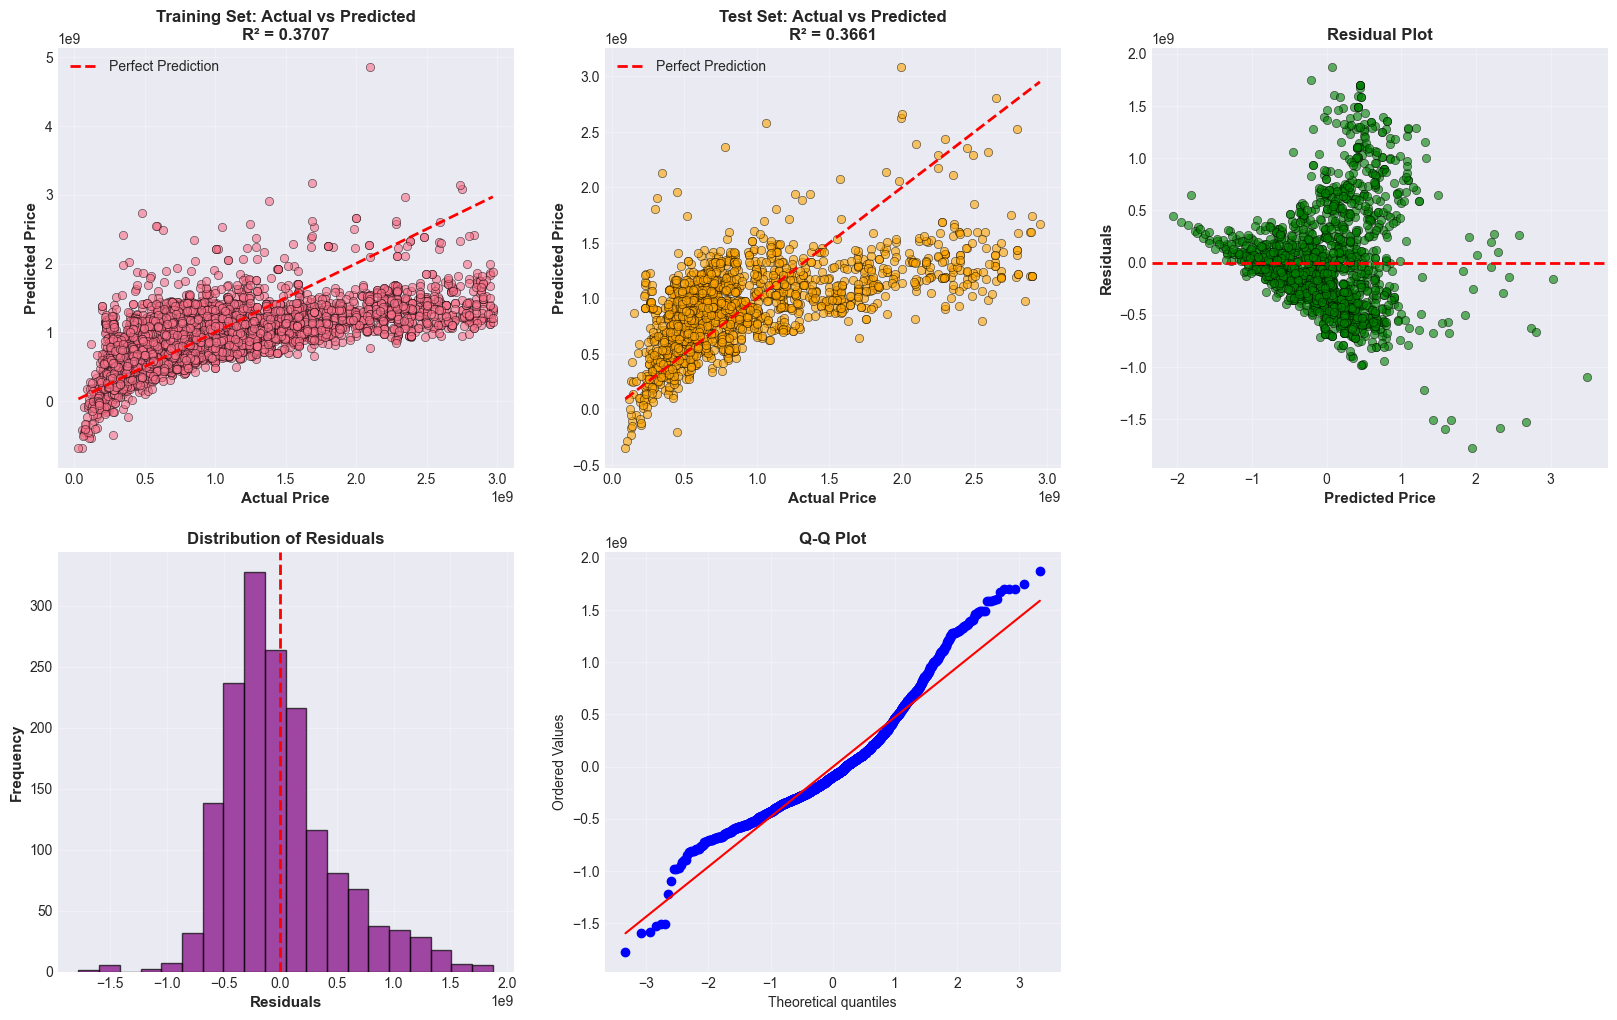

In [21]:
print("\n\n📉 BƯỚC 7: VISUALIZATION")
print("-" * 80)

y_train_ = inverse_zscore(y_train)
y_train_pred_ = inverse_zscore(y_train_pred)

y_test_ = inverse_zscore(y_test)
y_test_pred_ = inverse_zscore(y_test_pred)

fig = plt.figure(figsize=(20, 12))

# 1. Actual vs Predicted (Training)
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_train_, y_train_pred_, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_train_.min(), y_train_.max()], [y_train_.min(), y_train_.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
ax2 = plt.subplot(2, 3, 2)
plt.scatter(y_test_, y_test_pred_, alpha=0.6, edgecolors='k', linewidth=0.5, color='orange')
plt.plot([y_test_.min(), y_test_.max()], [y_test_.min(), y_test_.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=11, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=11, fontweight='bold')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}', 
          fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual Plot
ax3 = plt.subplot(2, 3, 3)
plt.scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price', fontsize=11, fontweight='bold')
plt.ylabel('Residuals', fontsize=11, fontweight='bold')
plt.title('Residual Plot', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Histogram of Residuals
ax4 = plt.subplot(2, 3, 4)
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7, color='purple')
plt.xlabel('Residuals', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Distribution of Residuals', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

# 5. Q-Q Plot
ax5 = plt.subplot(2, 3, 5)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

✓ Đã lưu biểu đồ: linear_regression_analysis.png


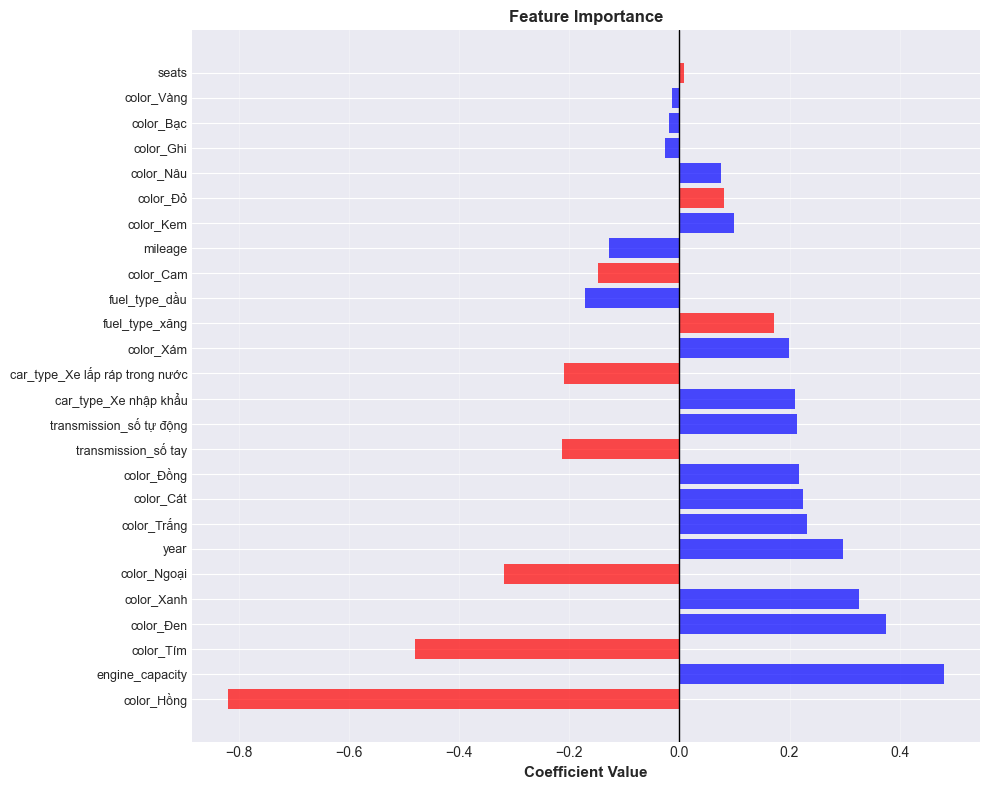

In [61]:
# 6. Feature Importance
# ax6 = plt.subplot(2, 3, 6)
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
full_features = feature_importance
colors = ['red' if x < 0 else 'blue' for x in top_features['Coefficient']]
plt.barh(range(len(full_features)), full_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(full_features)), full_features['Feature'], fontsize=9)
plt.xlabel('Coefficient Value', fontsize=11, fontweight='bold')
plt.title('Feature Importance', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', lw=1)
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('linear_regression_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Đã lưu biểu đồ: linear_regression_analysis.png")
plt.show()

# 8. TÓM TẮT KẾT QUẢ

In [ ]:
print("\n\n" + "="*80)
print("📋 TÓM TẮT KẾT QUẢ MÔ HÌNH LINEAR REGRESSION")
print("="*80)

summary = f"""
🎯 HIỆU SUẤT MÔ HÌNH:
{'='*80}
Training Set:
  • R² Score: {train_metrics['R2']:.6f}
  • Adjusted R²: {train_metrics['Adj_R2']:.6f}
  • RMSE: {train_metrics['RMSE']:.6f}
  • MAE: {train_metrics['MAE']:.6f}

Test Set:
  • R² Score: {test_metrics['R2']:.6f}
  • Adjusted R²: {test_metrics['Adj_R2']:.6f}
  • RMSE: {test_metrics['RMSE']:.6f}
  • MAE: {test_metrics['MAE']:.6f}

Cross-Validation (5-Fold):
  • Mean R²: {cv_scores.mean():.6f} (±{cv_scores.std():.6f})

{'='*80}
📊 ĐÁNH GIÁ:
"""

if test_metrics['R2'] > 0.8:
    summary += "  ✓ Mô hình dự đoán RẤT TỐT (R² > 0.8)\n"
elif test_metrics['R2'] > 0.6:
    summary += "  ✓ Mô hình dự đoán TỐT (R² > 0.6)\n"
elif test_metrics['R2'] > 0.4:
    summary += "  ⚠️  Mô hình dự đoán TRUNG BÌNH (R² > 0.4)\n"
else:
    summary += "  ❌ Mô hình dự đoán YẾU (R² < 0.4)\n"

if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    summary += "  ✓ Mô hình tổng quát tốt (không overfitting)\n"
else:
    summary += "  ⚠️  Cần xem xét overfitting\n"

summary += f"""
{'='*80}
🔑 FEATURES QUAN TRỌNG NHẤT:
"""

for idx, row in feature_importance.head(5).iterrows():
    summary += f"  {idx+1}. {row['Feature']}: {row['Coefficient']:.6f}\n"

summary += "="*80

print(summary)

# Lưu kết quả vào file
with open('model_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)
print("\n✓ Đã lưu tóm tắt kết quả: model_summary.txt")

print("\n🎉 HOÀN THÀNH PHÂN TÍCH!")
print("="*80)